# **Disney Movies Analysis**

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# Load the dataset
df=pd.read_csv('disney_movies.csv')

In [29]:
df.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,21-12-1937,Musical,G,184925485,5228953251
1,Pinocchio,09-02-1940,Adventure,G,84300000,2188229052
2,Fantasia,13-11-1940,Musical,G,83320000,2187090808
3,Song of the South,12-11-1946,Adventure,G,65000000,1078510579
4,Cinderella,15-02-1950,Drama,G,85000000,920608730


In [30]:
df.shape

(579, 6)

In [31]:
df.describe()

,total_gross,inflation_adjusted_gross
count,5.790000e+02,5.790000e+02
mean,6.470179e+07,1.187625e+08
std,9.301301e+07,2.860853e+08
min,0.000000e+00,0.000000e+00
25%,1.278886e+07,2.274123e+07
50%,3.070245e+07,5.515978e+07
75%,7.570903e+07,1.192020e+08
max,9.366622e+08,5.228953e+09


Data Cleaning and Preprocessing

In [32]:
# Check for missing values
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


,0
movie_title,0
release_date,0
genre,17
mpaa_rating,56
total_gross,0
inflation_adjusted_gross,0


In [33]:
df['genre'].unique()

array(['Musical', 'Adventure', 'Drama', 'Comedy', nan, 'Action', 'Horror',
       'Romantic Comedy', 'Thriller/Suspense', 'Western', 'Black Comedy',
       'Documentary', 'Concert/Performance'], dtype=object)

In [34]:
 # Fill missing genres
df['genre'] = df['genre'].fillna('Unknown')

In [35]:
df['genre'].unique()

array(['Musical', 'Adventure', 'Drama', 'Comedy', 'Unknown', 'Action',
       'Horror', 'Romantic Comedy', 'Thriller/Suspense', 'Western',
       'Black Comedy', 'Documentary', 'Concert/Performance'], dtype=object)

In [36]:
# Fill missing ratings
df['mpaa_rating'] = df['mpaa_rating'].fillna('Not Rated')

In [37]:
df['mpaa_rating'].unique()

array(['G', 'Not Rated', 'PG', 'R', 'PG-13'], dtype=object)

In [38]:
# Convert to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

<ipython-input-38-ad98c1a39e53>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')


In [53]:
df.duplicated().sum()

0

In [59]:
most_profitable = df.loc[df['inflation_adjusted_gross'].idxmax()]
print("Most Profitable Movie:\n", most_profitable)

Most Profitable Movie:
 movie_title                 Snow White and the Seven Dwarfs
release_date                            1937-12-21 00:00:00
genre                                               Musical
mpaa_rating                                               G
total_gross                                       184925485
inflation_adjusted_gross                         5228953251
Name: 0, dtype: object


In [60]:
genre_counts = df['genre'].value_counts()
print("\nGenre Counts:\n", genre_counts)


Genre Counts:
 genre
Comedy                 182
Adventure              129
Drama                  114
Action                  40
Thriller/Suspense       24
Romantic Comedy         23
Unknown                 17
Musical                 16
Documentary             16
Western                  7
Horror                   6
Black Comedy             3
Concert/Performance      2
Name: count, dtype: int64


In [61]:
top_10_movies = df.nlargest(10, 'inflation_adjusted_gross')
print("\nTop 10 Highest-Grossing Movies:\n", top_10_movies)


Top 10 Highest-Grossing Movies:
                               movie_title release_date      genre mpaa_rating  \
0         Snow White and the Seven Dwarfs   1937-12-21    Musical           G   
1                               Pinocchio   1940-02-09  Adventure           G   
2                                Fantasia   1940-11-13    Musical           G   
8                          101 Dalmatians   1961-01-25     Comedy           G   
6                      Lady and the Tramp   1955-06-22      Drama           G   
3                       Song of the South   1946-11-12  Adventure           G   
564  Star Wars Ep. VII: The Force Awakens   2015-12-18  Adventure       PG-13   
4                              Cinderella   1950-02-15      Drama           G   
13                        The Jungle Book   1967-10-18    Musical   Not Rated   
179                         The Lion King   1994-06-15  Adventure           G   

     total_gross  inflation_adjusted_gross  
0      184925485             

In [62]:
top_genres = df.groupby('genre')['inflation_adjusted_gross'].sum().nlargest(5)
print("\nTop 5 Genres by Inflation-Adjusted Gross:\n", top_genres)


Top 5 Genres by Inflation-Adjusted Gross:
 genre
Adventure    24561266158
Comedy       15409526913
Musical       9657565776
Drama         8195804484
Action        5498936786
Name: inflation_adjusted_gross, dtype: int64


In [63]:
top_rated_movies = df.groupby('mpaa_rating')['inflation_adjusted_gross'].sum()
print("\nTotal Gross by MPAA Rating:\n", top_rated_movies)


Total Gross by MPAA Rating:
 mpaa_rating
G            25048445571
Not Rated     4158070498
PG           18988248082
PG-13        14927544680
R             5641192166
Name: inflation_adjusted_gross, dtype: int64


# Exploratory Data Analysis & Visualization

<ipython-input-41-a9a32014e4e5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')


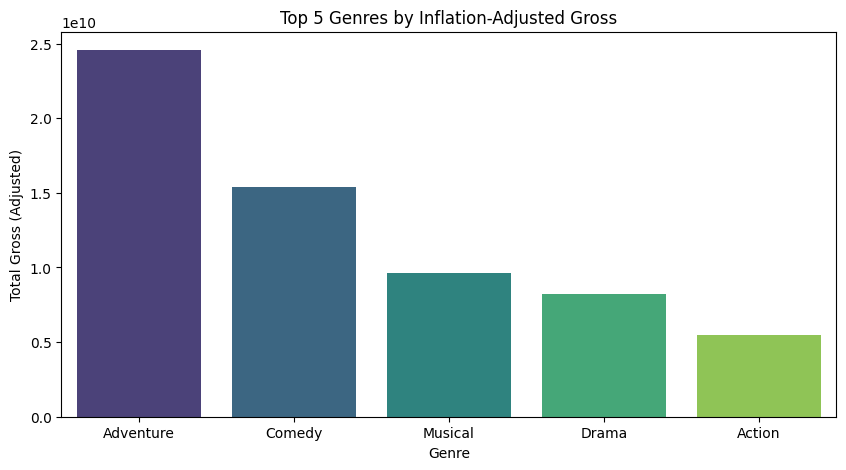

In [41]:
# Plot a bar chart to visualize the top 5 highest-grossing genres based on inflation-adjusted revenue.

plt.figure(figsize=(10, 5))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
plt.title('Top 5 Genres by Inflation-Adjusted Gross')
plt.xlabel('Genre')
plt.ylabel('Total Gross (Adjusted)')
plt.show()

<ipython-input-64-e66414f8ae73>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_movies['movie_title'], y=top_10_movies['inflation_adjusted_gross'], palette='coolwarm')


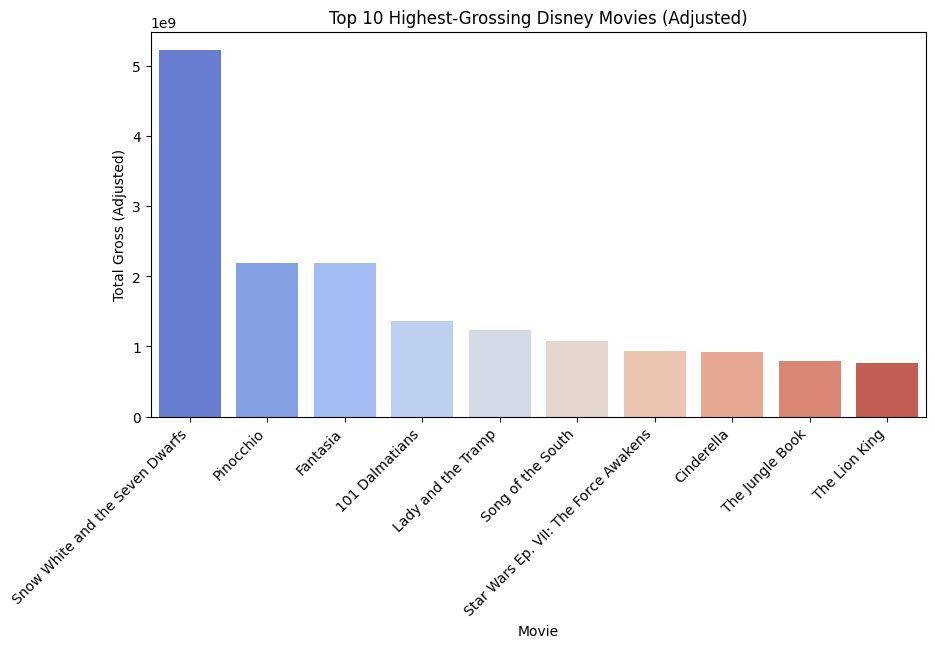

In [64]:
# Plot a bar chart to visualize the top 10 highest-grossing Disney movies based on inflation-adjusted revenue.

plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_movies['movie_title'], y=top_10_movies['inflation_adjusted_gross'], palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Highest-Grossing Disney Movies (Adjusted)')
plt.xlabel('Movie')
plt.ylabel('Total Gross (Adjusted)')
plt.show()

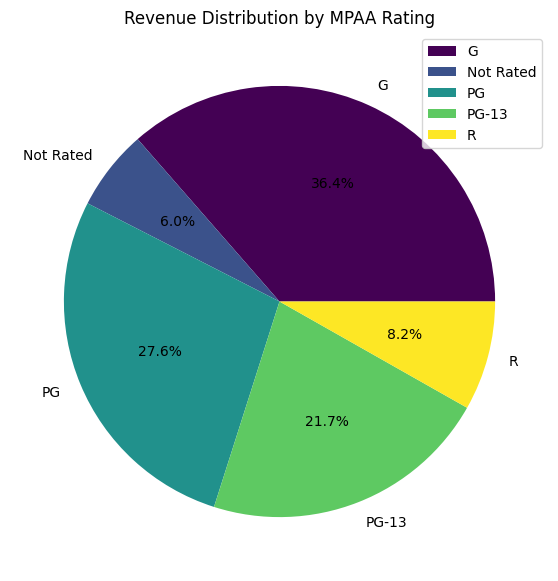

In [66]:
# Plot a pie chart to show the revenue distribution of Disney movies based on MPAA ratings.

top_rated_movies = df.groupby('mpaa_rating')['inflation_adjusted_gross'].sum()

plt.figure(figsize=(7, 7))
top_rated_movies.plot(kind='pie', autopct='%1.1f%%', colormap='viridis', legend=True)
plt.title('Revenue Distribution by MPAA Rating')
plt.ylabel('')
plt.show()


<ipython-input-44-854c33ab092f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['genre'], y=df['inflation_adjusted_gross'], palette='Set2')


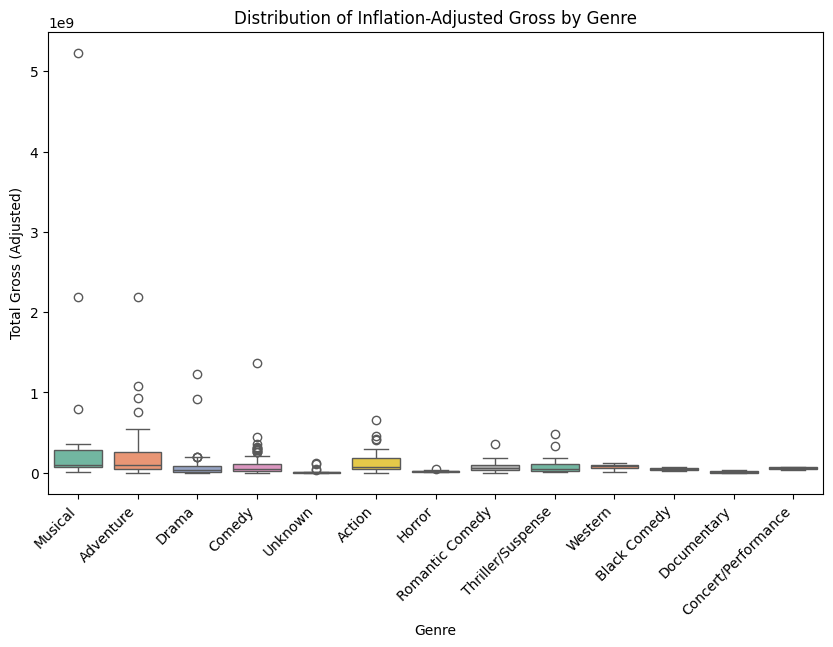

In [44]:
# Plot a box plot to visualize the distribution of inflation-adjusted gross revenue across different genres.

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['genre'], y=df['inflation_adjusted_gross'], palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Inflation-Adjusted Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Gross (Adjusted)')
plt.show()

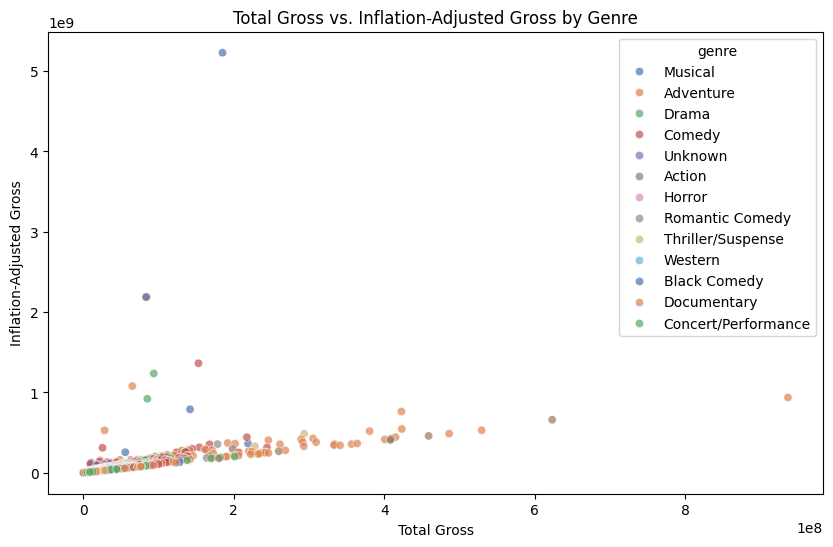

In [45]:
# Plot a scatter plot to compare total gross vs. inflation-adjusted gross, categorized by genre.

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['total_gross'], y=df['inflation_adjusted_gross'], hue=df['genre'], palette='deep', alpha=0.7)
plt.title('Total Gross vs. Inflation-Adjusted Gross by Genre')
plt.xlabel('Total Gross')
plt.ylabel('Inflation-Adjusted Gross')
plt.show()

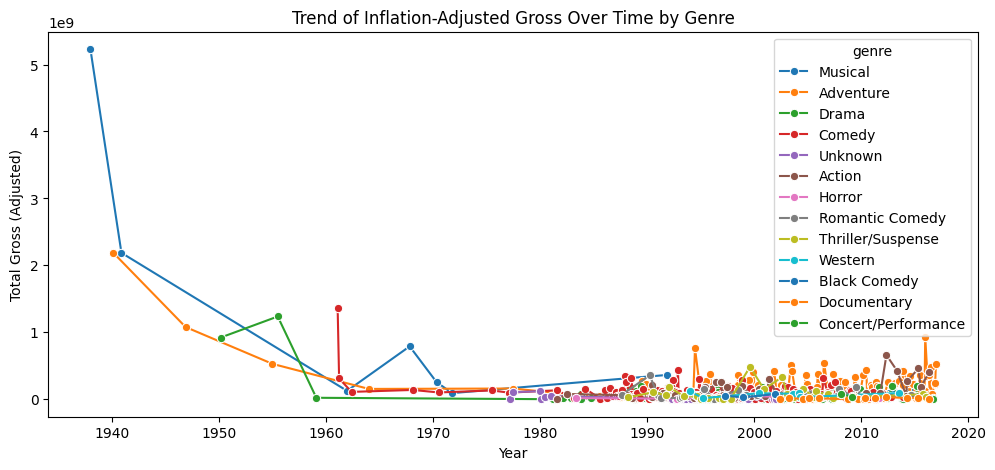

In [46]:
# Plot a line chart to show the trend of inflation-adjusted gross revenue over time, categorized by genre.

plt.figure(figsize=(12, 5))
sns.lineplot(x=df['release_date'], y=df['inflation_adjusted_gross'], hue=df['genre'], marker='o', palette='tab10')
plt.title('Trend of Inflation-Adjusted Gross Over Time by Genre')
plt.xlabel('Year')
plt.ylabel('Total Gross (Adjusted)')
plt.show()

In [47]:
# Filter and display movies that belong to the user-specified genre.

genre_name = input("Enter genre: ")
genre_movies = df[df['genre'].str.contains(genre_name, case=False, na=False)]
print(genre_movies)

Enter genre: Adventure
                      movie_title release_date      genre mpaa_rating  \
1                       Pinocchio   1940-02-09  Adventure           G   
3               Song of the South   1946-11-12  Adventure           G   
5    20,000 Leagues Under the Sea   1954-12-23  Adventure   Not Rated   
12         The Sword in the Stone   1963-12-25  Adventure   Not Rated   
21                   The Rescuers   1977-06-22  Adventure   Not Rated   
..                            ...          ...        ...         ...   
572                       The BFG   2016-07-01  Adventure          PG   
573                 Pete’s Dragon   2016-08-12  Adventure          PG   
576                Doctor Strange   2016-11-04  Adventure       PG-13   
577                         Moana   2016-11-23  Adventure          PG   
578  Rogue One: A Star Wars Story   2016-12-16  Adventure       PG-13   

     total_gross  inflation_adjusted_gross  
1       84300000                2188229052  
3       65

In [48]:
# Search and display information about a movie based on user input.

movie_name = input("Enter movie name: ")
movie_info = df[df['movie_title'].str.contains(movie_name, case=False, na=False)]
print(movie_info)

Enter movie name: frozen
    movie_title release_date      genre mpaa_rating  total_gross  \
539      Frozen   2013-11-22  Adventure          PG    400738009   

     inflation_adjusted_gross  
539                 414997174  


In [49]:
# Calculate percentage contribution of each genre to total revenue
genre_revenue_percentage = (df.groupby('genre')['inflation_adjusted_gross'].sum() / df['inflation_adjusted_gross'].sum()) * 100
print("Percentage Contribution of Each Genre to Total Revenue:\n", genre_revenue_percentage)

Percentage Contribution of Each Genre to Total Revenue:
 genre
Action                  7.996883
Adventure              35.718464
Black Comedy            0.227927
Comedy                 22.409457
Concert/Performance     0.166981
Documentary             0.295925
Drama                  11.918830
Horror                  0.204299
Musical                14.044610
Romantic Comedy         2.601486
Thriller/Suspense       3.129118
Unknown                 0.534591
Western                 0.751431
Name: inflation_adjusted_gross, dtype: float64


In [50]:
# Calculate percentage contribution of each MPAA rating to total revenue
rating_revenue_percentage = (df.groupby('mpaa_rating')['inflation_adjusted_gross'].sum() / df['inflation_adjusted_gross'].sum()) * 100
print("\nPercentage Contribution of Each MPAA Rating to Total Revenue:\n", rating_revenue_percentage)


Percentage Contribution of Each MPAA Rating to Total Revenue:
 mpaa_rating
G            36.426949
Not Rated     6.046915
PG           27.613847
PG-13        21.708529
R             8.203759
Name: inflation_adjusted_gross, dtype: float64


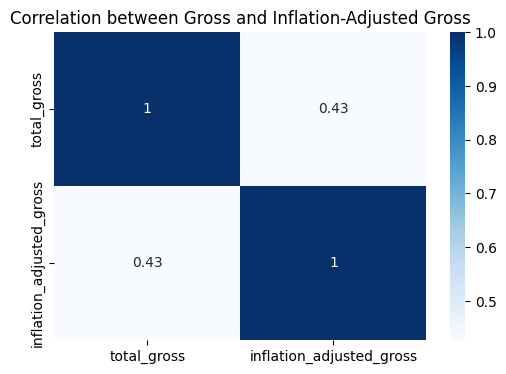

In [52]:
# Plot a heatmap to show the correlation between total gross and inflation-adjusted gross revenue.

correlation_matrix = df[['total_gross', 'inflation_adjusted_gross']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation between Gross and Inflation-Adjusted Gross')
plt.show()